<h1> Step 1: Split Data into Training and Testing Sets </h1>

In [1]:
import os
import random

For each emotion category, randomly select 70 as training samples and the remaining 30 as testing samples.

In [2]:
angry_files = []
angry_test = []
for filename in os.listdir("data_folder/angry/"):
    f = os.path.join("./data_folder/angry/", filename)
    if os.path.isfile:
        angry_files.append(f)
angry_training=random.sample(angry_files, k=70)
for file in angry_files:
    if file not in angry_training:
        angry_test.append(file)

fear_files = []
fear_test = []
for filename in os.listdir("data_folder/fear/"):
    f = os.path.join("./data_folder/fear/", filename)
    if os.path.isfile:
        fear_files.append(f)
fear_training=random.sample(fear_files, k=70)
for file in fear_files:
    if file not in fear_training:
        fear_test.append(file)

happy_files = []
happy_test = []
for filename in os.listdir("data_folder/happy/"):
    f = os.path.join("./data_folder/happy/", filename)
    if os.path.isfile:
        happy_files.append(f)
happy_training=random.sample(happy_files, k=70)
for file in happy_files:
    if file not in happy_training:
        happy_test.append(file)

sad_files = []
sad_test = []
for filename in os.listdir("data_folder/sad/"):
    f = os.path.join("./data_folder/sad/", filename)
    if os.path.isfile:
        sad_files.append(f)
sad_training=random.sample(sad_files, k=70)
for file in sad_files:
    if file not in sad_training:
        sad_test.append(file)


<h1> Step 2: Exploratory Data Analysis <h1>

In [3]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

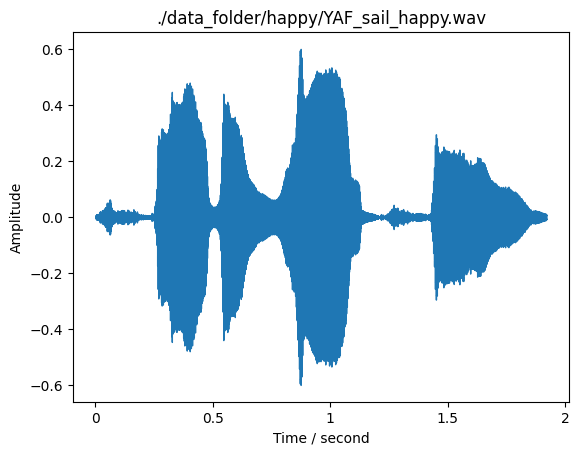

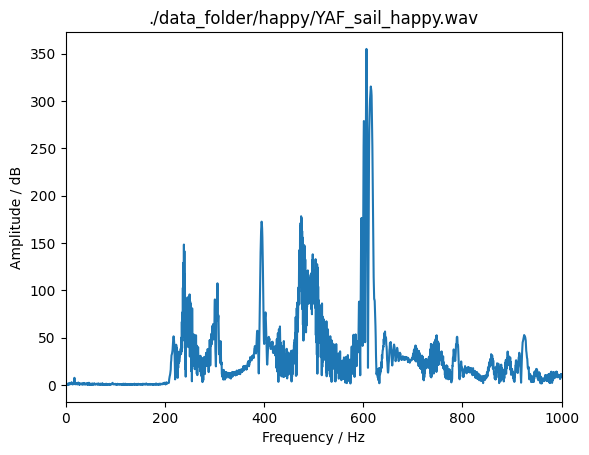

In [4]:
# plot audio in time and frequency domain
y,sr = librosa.load(happy_training[0])

# plot audio files in time domain
plt.figure(1)
librosa.display.waveshow(y=y, sr=sr)
plt.xlabel('Time / second')
plt.ylabel('Amplitude')
plt.title(happy_training[0])
plt.show()

# plot audio files in frequency domain
k = np.arange(len(y))
T = len(y)/sr
freq = k/T

DATA_0 = np.fft.fft(y)
abs_DATA_0 = abs(DATA_0)
plt.figure(2)
plt.plot(freq, abs_DATA_0)
plt.xlabel("Frequency / Hz")
plt.ylabel("Amplitude / dB")
plt.title(happy_training[0])
plt.xlim([0, 1000])
plt.show()

<h1> Step 3: Acoustic Feature Extraction </h1>

In [5]:
import pandas as pd

In [6]:
# make a dataframe for each audio with audio features
def audioFeatureExtraction(audio_file):
    signal, sample_rate = librosa.load(audio_file)
    # Set frame parameters
    n_fft = 2048
    hop_length = 512

    stft = librosa.stft(y = signal,  n_fft=n_fft, hop_length=hop_length)


    # get the loudness of the audio
    df_temp_loudness = pd.DataFrame()
    S, phase = librosa.magphase(stft)
    rms = librosa.feature.rms(S=S, frame_length=n_fft, hop_length=hop_length)
    df_temp_loudness['Loudness'] = rms[0]

    # get the mfcc of the audio
    df_mfccs = pd.DataFrame()
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate,n_mfcc=12,  n_fft=n_fft, hop_length=hop_length)
    for n_mfcc in range(len(mfccs)):
        df_mfccs['MFCC_%d'%(n_mfcc+1)] = mfccs.T[n_mfcc]

    # get the zcr of the audio
    df_zero_crossing_rate_temp = pd.DataFrame()
    zcr = librosa.feature.zero_crossing_rate(y=signal, frame_length=n_fft, hop_length=hop_length)
    df_zero_crossing_rate_temp['ZCR'] = zcr[0]

    # get the chroma of the audio
    df_chroma = pd.DataFrame()
    chromagram = librosa.feature.chroma_stft(y=signal, sr=sample_rate, n_fft=n_fft, hop_length=hop_length)
    for n_chroma in range(len(chromagram)):
        df_chroma['Chroma_%d'%(n_chroma+1)] = chromagram.T[n_chroma]

    # get the melspectogram of the audio
    df_mel_spectrogram = pd.DataFrame()
    mel_spectrogram = librosa.feature.melspectrogram(y=signal, sr=sample_rate, n_mels=12)
    for n_mel in range(len(mel_spectrogram)):
        df_mel_spectrogram['Mel_Spectrogram_%d'%(n_mel+1)] = mel_spectrogram.T[n_mel]

    #average the loudness for the 12 interval time frame
    n_rows = 12
    col_loudness = df_temp_loudness["Loudness"].to_numpy()
    elements_per_row = len(col_loudness) // n_rows
    averaged_col = np.mean(col_loudness[:n_rows * elements_per_row].reshape(n_rows, -1), axis=1)
    df_loudness = pd.DataFrame()
    df_loudness["Loudness"] = averaged_col

    #average the zcr for the 12 interval time frame
    n_rows = 12
    col_ZCR = df_zero_crossing_rate_temp["ZCR"].to_numpy()
    elements_per_row = len(col_ZCR) // n_rows
    averaged_col = np.mean(col_ZCR[:n_rows * elements_per_row].reshape(n_rows, -1), axis=1)
    df_ZCR = pd.DataFrame()
    df_ZCR["ZCR"] = averaged_col


    # combine all features
    feature_matrix = pd.concat([df_loudness, df_mfccs, df_ZCR, df_chroma, df_mel_spectrogram,], axis=1)
    audio_file_name = audio_file.replace("./data_folder", "./feature_matrix")
    csvname = audio_file_name + "-feature-matrix.csv"
    feature_matrix.to_csv(csvname)

    return csvname

In [7]:
csv_angry_test = []
csv_angry_training = []
for audio in angry_test:
    csv_angry_test.append(audioFeatureExtraction(audio))

for audio in angry_training:
    csv_angry_training.append(audioFeatureExtraction(audio))

In [8]:
csv_fear_test = []
csv_fear_training = []
for audio in fear_test:
    csv_fear_test.append(audioFeatureExtraction(audio))

for audio in fear_training:
    csv_fear_training.append(audioFeatureExtraction(audio))

In [9]:
csv_happy_test = []
csv_happy_training = []
for audio in happy_test:
    csv_happy_test.append(audioFeatureExtraction(audio))

for audio in happy_training:
    csv_happy_training.append(audioFeatureExtraction(audio))

In [10]:
csv_sad_test = []
csv_sad_training = []
for audio in sad_test:
    csv_sad_test.append(audioFeatureExtraction(audio))

for audio in sad_training:
    csv_sad_training.append(audioFeatureExtraction(audio))

<h1>Step 4: Feature Post-processing</h1>

Feature Matrix Scaling, Feature Concatenation, and Averaging

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
def postProcessing(file_name):
    df = pd.read_csv(file_name)
    df.fillna(0)
    scaler = MinMaxScaler()

    df_scaled = scaler.fit_transform(df.to_numpy())
    df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
    df_scaled.head()
    array_list = []

    # iterate over rows of dataframe and convert each row to an array
    for index, row in df.iterrows():
        row_array = row.values
        feature_average = np.mean(row_array) # average for each time window
        array_list.append(feature_average)

    array_list = np.array(array_list)
    # create boolean mask of non-NaN values
    mask = ~np.isnan(array_list)

    # filter array with mask
    array_list_filtered = array_list[mask]
    return array_list_filtered

In [13]:
angry_training_final = []
angry_test_final = []
for csv in csv_angry_training:
    angry_training_final.append(postProcessing(csv))
for csv in csv_angry_test:
    angry_test_final.append(postProcessing(csv))

In [14]:
fear_training_final = []
fear_test_final = []
for csv in csv_fear_training:
    fear_training_final.append(postProcessing(csv))
for csv in csv_fear_test:
    fear_test_final.append(postProcessing(csv))

In [15]:
happy_training_final = []
happy_test_final = []
for csv in csv_happy_training:
    happy_training_final.append(postProcessing(csv))
for csv in csv_happy_test:
    happy_test_final.append(postProcessing(csv))

In [16]:
sad_training_final = []
sad_test_final = []
for csv in csv_sad_training:
    sad_training_final.append(postProcessing(csv))
sad_test_final = []
for csv in csv_sad_test:
    sad_test_final.append(postProcessing(csv))

<h1>Step 5: Build your audio emotion recognition model</h1>

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [18]:
x_train = []
y_train = []
for item in angry_training_final:
    x_train.append(item)
    y_train.append("angry")
for item in fear_training_final:
    x_train.append(item)
    y_train.append("fear")
for item in happy_training_final:
    x_train.append(item)
    y_train.append("happy")
for item in sad_training_final:
    x_train.append(item)
    y_train.append("sad")

In [19]:
x_test = []
y_test = []
for item in angry_test_final:
    x_test.append(item)
    y_test.append("angry")
for item in fear_test_final:
    x_test.append(item)
    y_test.append("fear")
for item in happy_test_final:
    x_test.append(item)
    y_test.append("happy")
for item in sad_test_final:
    x_test.append(item)
    y_test.append("sad")

In [20]:
X_train = np.array(x_train)
Y_train = y_train

X_test = np.array(x_test)
Y_test = y_test

MLP Classifier

In [21]:
model = MLPClassifier(hidden_layer_sizes=(200,), learning_rate='adaptive', max_iter=1000)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_true=Y_test, y_pred=y_pred)
print("Accuracy of the Recognizer is: {:.1f}%".format(accuracy*100))
print(classification_report(Y_test, y_pred))

Accuracy of the Recognizer is: 94.2%
              precision    recall  f1-score   support

       angry       1.00      1.00      1.00        30
        fear       0.87      0.90      0.89        30
       happy       1.00      0.90      0.95        30
         sad       0.91      0.97      0.94        30

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120



SVC

In [22]:
svc = SVC(probability=True) # SVM
svc.fit(X_train, Y_train)

y_svc_predicted = svc.predict(X_test)
y_svc_pred_proba = svc.predict_proba(X_test)

accuracy = accuracy_score(y_true=Y_test, y_pred=y_pred)
print("Accuracy of the Recognizer is: {:.1f}%".format(accuracy*100))
print(classification_report(Y_test, y_svc_predicted))

Accuracy of the Recognizer is: 94.2%
              precision    recall  f1-score   support

       angry       0.92      0.80      0.86        30
        fear       0.67      0.60      0.63        30
       happy       0.70      0.77      0.73        30
         sad       0.88      1.00      0.94        30

    accuracy                           0.79       120
   macro avg       0.79      0.79      0.79       120
weighted avg       0.79      0.79      0.79       120



Naive Bayes

In [23]:
nbc = GaussianNB() # naive bayes
nbc.fit(X_train, Y_train)

y_nbc_predicted = nbc.predict(X_test)
y_nbc_pred_proba = nbc.predict_proba(X_test)

accuracy = accuracy_score(y_true=Y_test, y_pred=y_pred)
print("Accuracy of the Recognizer is: {:.1f}%".format(accuracy*100))
print(classification_report(Y_test, y_nbc_predicted))

Accuracy of the Recognizer is: 94.2%
              precision    recall  f1-score   support

       angry       0.79      0.90      0.84        30
        fear       0.76      0.63      0.69        30
       happy       0.90      0.87      0.88        30
         sad       0.94      1.00      0.97        30

    accuracy                           0.85       120
   macro avg       0.85      0.85      0.85       120
weighted avg       0.85      0.85      0.85       120



Random Forest

In [24]:
rfc = RandomForestClassifier() # random forest
rfc.fit(X_train, Y_train)

y_rfc_predicted = rfc.predict(X_test)
y_rfc_pred_proba = rfc.predict_proba(X_test)

accuracy = accuracy_score(y_true=Y_test, y_pred=y_pred)
print("Accuracy of the Recognizer is: {:.1f}%".format(accuracy*100))
print(classification_report(Y_test, y_rfc_predicted))

Accuracy of the Recognizer is: 94.2%
              precision    recall  f1-score   support

       angry       0.97      0.97      0.97        30
        fear       0.90      0.90      0.90        30
       happy       0.90      0.90      0.90        30
         sad       1.00      1.00      1.00        30

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120



In [25]:
#resource: https://sonsuzdesign.blog/2021/03/15/building-a-speech-emotion-recognizer-using-python/